In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

In [3]:
df_=pd.read_csv('Dataset .csv')
df_.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df_.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df_['Cuisines'].fillna(df_['Cuisines'].mode()[0], inplace=True)

C:\Users\91810\AppData\Local\Temp\ipykernel_3780\2768750007.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_['Cuisines'].fillna(df_['Cuisines'].mode()[0], inplace=True)


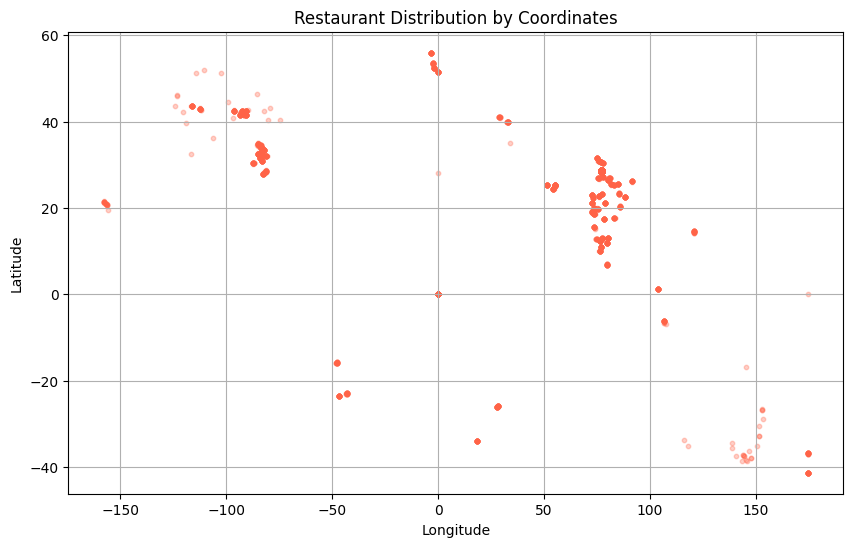

In [6]:

# Scatter plot of restaurant locations
plt.figure(figsize=(10,6))
plt.scatter(df_['Longitude'], df_['Latitude'], alpha=0.3, s=10, c='tomato')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Distribution by Coordinates')
plt.grid(True)
plt.show()


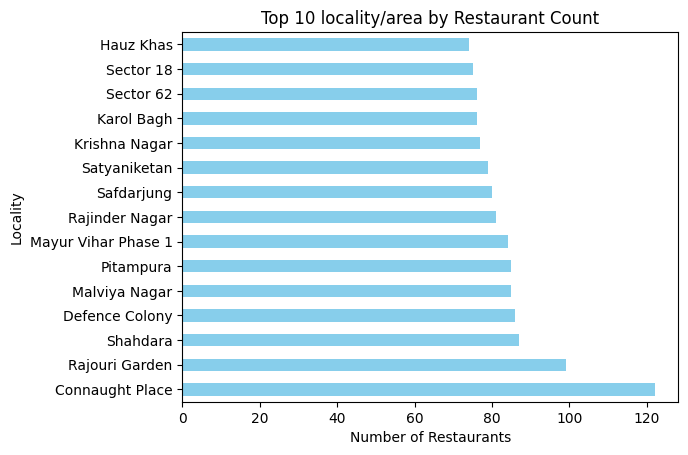

In [7]:
locality_counts = df_['Locality'].value_counts()
locality_counts.head(15).plot(kind='barh', color='skyblue', title='Top 10 locality/area by Restaurant Count')
plt.xlabel("Number of Restaurants")
plt.show()

In [8]:
locality_counts

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

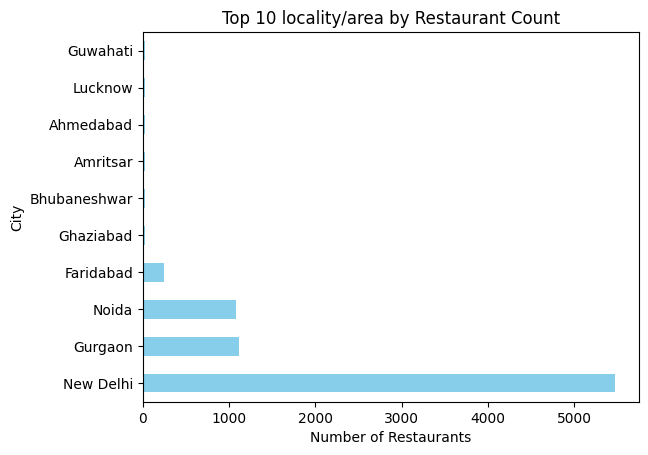

In [9]:
city_counts = df_['City'].value_counts()
city_counts.head(10).plot(kind='barh', color='skyblue', title='Top 10 locality/area by Restaurant Count')
plt.xlabel("Number of Restaurants")
plt.show()

In [10]:
city_counts

City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: count, Length: 141, dtype: int64

In [11]:
avg_stats_city = df_.groupby('City')[['Average Cost for two', 'Aggregate rating']].mean().sort_values('Average Cost for two', ascending=False)
print(avg_stats_city)

                Average Cost for two  Aggregate rating
City                                                  
Jakarta                308437.500000          4.356250
Tangerang              250000.000000          4.300000
Bogor                  160000.000000          3.850000
Bandung                150000.000000          4.200000
Pasay City               3333.333333          4.366667
...                              ...               ...
Mc Millan                  10.000000          2.400000
Inverloch                   7.000000          3.700000
Lakes Entrance              7.000000          3.800000
Dicky Beach                 7.000000          3.600000
Miller                      0.000000          3.400000

[141 rows x 2 columns]


In [12]:
top_quality = df_[(df_['Aggregate rating'] > 4.5) & (df_['Average Cost for two'] > 1500)]
print(top_quality[['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Aggregate rating', 'Average Cost for two']])

                               Restaurant Name         City  \
8     Spiral - Sofitel Philippine Plaza Manila   Pasay City   
20                              NIU by Vikings  Taguig City   
727           The Fatty Bao - Asian Gastro Bar    Bangalore   
728                                       Toit    Bangalore   
809                                    Chili's      Chennai   
822                  AB's - Absolute Barbecues      Chennai   
1464          Manhattan Brewery & Bar Exchange      Gurgaon   
2302                                   Chili's    Hyderabad   
2304                                   Chili's    Hyderabad   
2350             Zolocrust - Hotel Clarks Amer       Jaipur   
2409                           Barbeque Nation      Kolkata   
2414                           Barbeque Nation      Kolkata   
2436                           Barbeque Nation      Lucknow   
2536                           Barbeque Nation       Nagpur   
3014                  Zabardast Indian Kitchen    New D

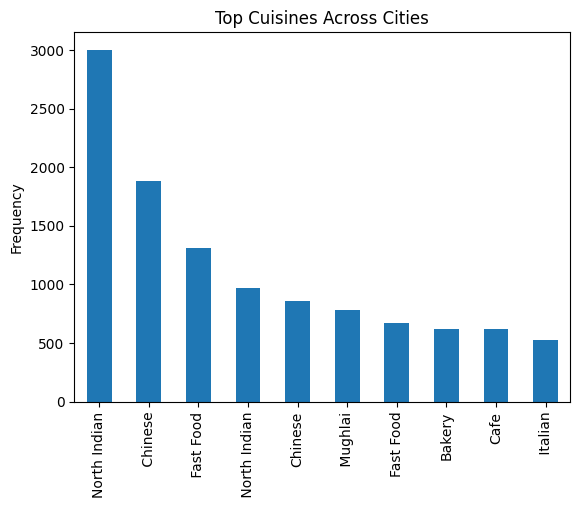

In [13]:
cuisine_distribution = df_.groupby('City')['Cuisines'].agg(lambda x: ','.join(x.astype(str))).str.split(',', expand=True).stack().value_counts().head(10)
cuisine_distribution.plot(kind='bar', title='Top Cuisines Across Cities')
plt.ylabel("Frequency")
plt.show()

<Axes: title={'center': 'Cities with Highest Rated Restaurants'}, xlabel='City'>

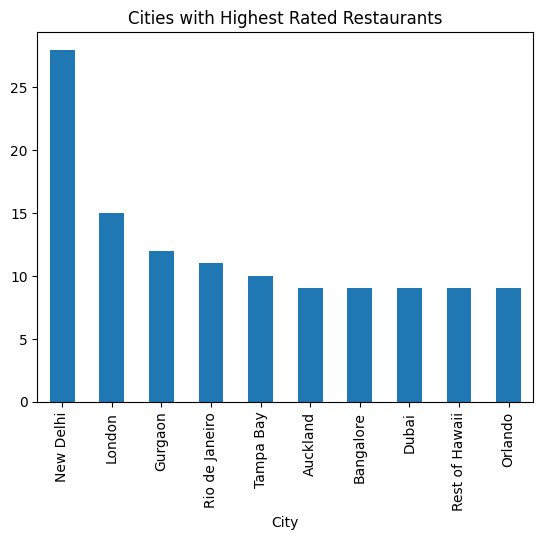

In [15]:
top_rated = df_[df_['Aggregate rating'] >= 4.5]
top_rated['City'].value_counts().head(10).plot(kind='bar', title='Cities with Highest Rated Restaurants')